In [143]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# data = pd.read_csv('/Users/amirhossein/Downloads/HW1 3/LAozone.data')
data = pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/LAozone.data')
dataset = data.copy()
dataset.tail()
stats = dataset.describe()
stats.pop('ozone')
stats=stats.T


In [79]:
########lets do some neural network regression##############3
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)
train_labels = train_dataset.pop('ozone')
test_labels = test_dataset.pop('ozone')
train_dataset=(train_dataset-stats['mean'])/stats['std']



W1021 17:19:24.659413 4498246976 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

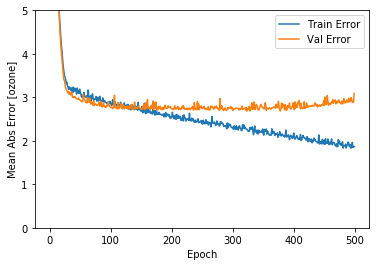

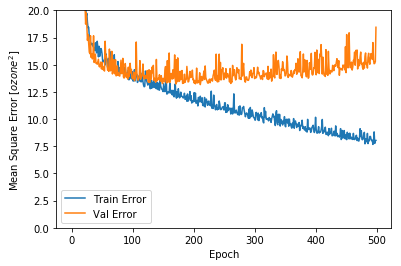

W1021 17:19:29.409617 4498246976 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


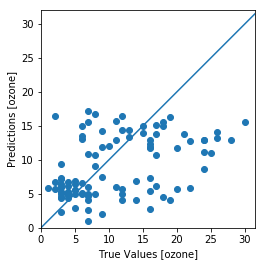

In [139]:


def build_model():
  model = keras.Sequential([
    layers.Dense(250, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(20, activation='selu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model=build_model()



class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  train_dataset,  train_labels,
  epochs=EPOCHS, validation_split = 0.5, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()



def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ozone]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ozone^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)




test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [ozone]')
plt.ylabel('Predictions [ozone]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


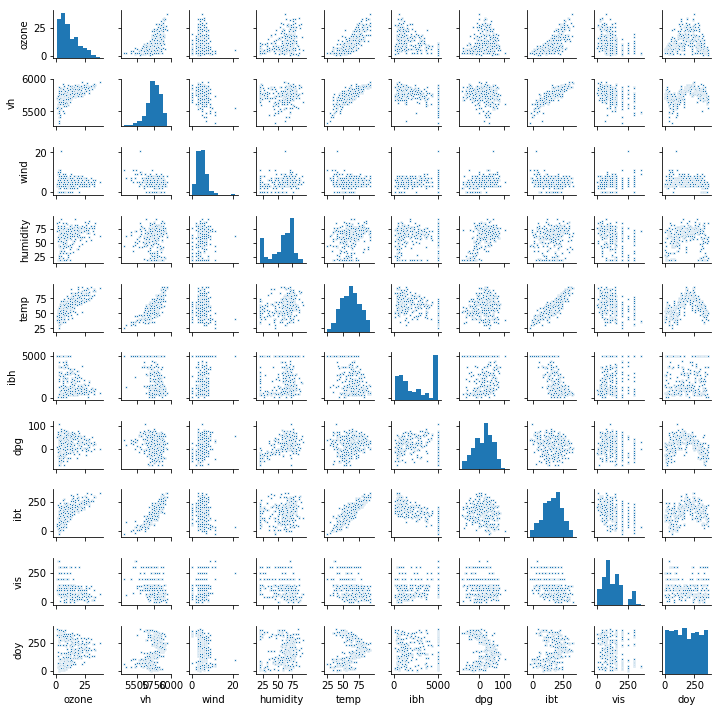

In [144]:
import seaborn as sns
sns.pairplot(
    data=data,
    vars=data.keys(),
    size=1,
    plot_kws={'s': 5}
);



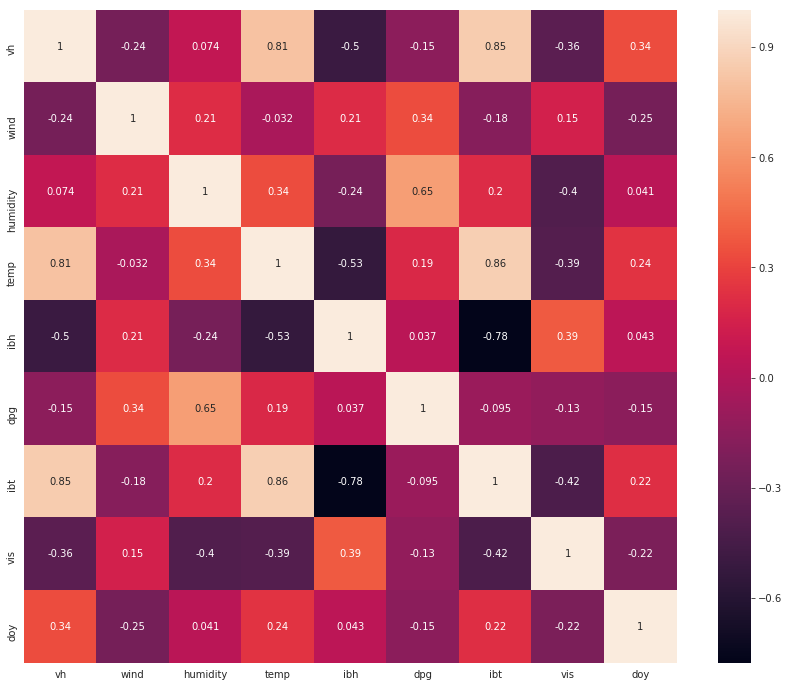

In [145]:
###############lets do some data visualization##################



data.pop('ozone')
corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(15, 12));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        square=True
    );


In [161]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# data = pd.read_csv('/Users/amirhossein/Downloads/HW1 3/LAozone.data')
data = pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/LAozone.data')
des=data.describe().T
norm_data=(data-des['mean'])/des['std']
y=norm_data.pop('ozone')
X=norm_data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42,shuffle=True)
pca = PCA(n_components=1)
X_new=pca.fit_transform(X)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)
print('mean square error for train',mean_squared_error(y_train,y_pred_train))
print('mean square error for test',mean_squared_error(y_test,y_pred_test))
print(reg.coef_)
print('intercept is',reg.intercept_)

mean square error for train 0.28785063984112624
mean square error for test 0.33679679927074624
[-0.08712919 -0.02592093  0.17967609  0.49963127 -0.14705347  0.00553081
  0.22538202 -0.06868307 -0.11857731]
intercept is -0.008742541724202272


In [158]:
x=reg.coef_
y=reg.intercept_
x=pd.DataFrame(x)
x['corresponding feature']=norm_data.keys()
x.rename(columns={0:'coefficents'
                 }, 
                 inplace=True)
ne=pd.DataFrame({'coefficents':[y],
                'corresponding feature':'intercept'})
x.append(ne)

,coefficents,corresponding feature
0,-0.087129,vh
1,-0.025921,wind
2,0.179676,humidity
3,0.499631,temp
4,-0.147053,ibh
5,0.005531,dpg
6,0.225382,ibt
7,-0.068683,vis
8,-0.118577,doy
0,-0.008743,intercept


mean square error for train 0.39542961228180457
mean square error for test 0.4204837795736287
beta1 is  [-0.39870005]
intercept is -0.016869195522502052


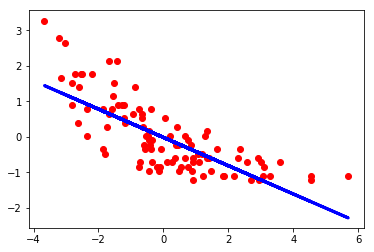

In [162]:
from matplotlib import pyplot as plt
pca = PCA(n_components=1)
X_new=pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.3, random_state=42,shuffle=True)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)
print('mean square error for train',mean_squared_error(y_train,y_pred_train))
print('mean square error for test',mean_squared_error(y_test,y_pred_test))
print('beta1 is ',reg.coef_)
print('intercept is',reg.intercept_)
plt.scatter(X_test,y_test,  color='red')
plt.plot(X_test,y_pred_test, color='blue', linewidth=3)
plt.show()

In [73]:
# print(max(X_new))
# print(min(X_new))
#####################Preparing data which is reduced diminsionaly in order to satisfy part d conditions##############
from sklearn.decomposition import PCA
data = pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/LAozone.data')
des=data.describe().T
norm_data=(data-des['mean'])/des['std']
y=norm_data.pop('ozone')
X=norm_data
pca = PCA(n_components=1)
X_new=pca.fit_transform(X)
X_new=pd.DataFrame(X_new)
y=pd.DataFrame(y)
X_new['y']=y
X2=X_new.sort_values(by=[0])
a=range(0,330,1)
X2['a']=a
X2=X2.set_index('a')
A=X2[0]
B=X2['y']
a1=[]
a2=[]
a3=[]
a4=[]
for i in range(165):
    a1.append(A[i])
    a2.append(B[i])
for i in range(165,330):
    a3.append(A[i])
    a4.append(B[i])

mean square error for train 0.4892457899084174
mean square error for test 0.5437729788137668
beta1 is  [-0.6790902]
intercept is -0.38464817009699326


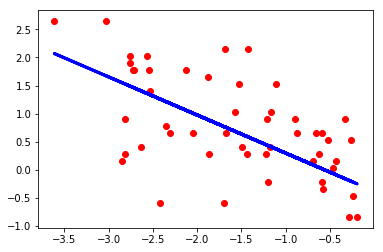

In [77]:
from matplotlib import pyplot as plt
a1=np.array(a1)
X_train, X_test, y_train, y_test = train_test_split(a1.reshape(-1, 1), a2, test_size=0.3, random_state=42,shuffle=True)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)
print('mean square error for train',mean_squared_error(y_train,y_pred_train))
print('mean square error for test',mean_squared_error(y_test,y_pred_test))
print('beta1 is ',reg.coef_)
print('intercept is',reg.intercept_)
plt.scatter(X_test,y_test,  color='red')
plt.plot(X_test,y_pred_test, color='blue', linewidth=3)

plt.show()


mean square error for train 0.12582913205222349
mean square error for test 0.1267526304415132
beta1 is  [-0.13026324]
intercept is -0.5202641270956978


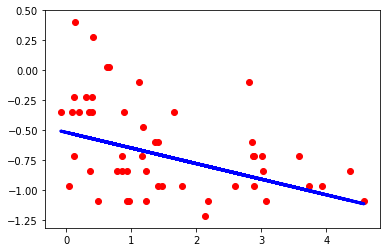

In [75]:
from matplotlib import pyplot as plt
a3=np.array(a3)
X_train, X_test, y_train, y_test = train_test_split(a3.reshape(-1, 1), a4, test_size=0.3, random_state=42,shuffle=True)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)
print('mean square error for train',mean_squared_error(y_train,y_pred_train))
print('mean square error for test',mean_squared_error(y_test,y_pred_test))
print('beta1 is ',reg.coef_)
print('intercept is',reg.intercept_)
plt.scatter(X_test,y_test,  color='red')
plt.plot(X_test,y_pred_test, color='blue', linewidth=3)
plt.show()
